<a href="https://colab.research.google.com/github/hawa1983/SD_Analyst/blob/main/Q_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parameters

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

schedule_rollup = 'Weekday'
train_line = "1"
Quarter = "Q1"
Month = "January"
Year = "2024"
Time_Period = "Weekdays"
trouble_code = "DELAYED BY TRACK/WORK GANGS"
line = "Line"
# Load the CSV file
file_path = '/content/Incident_List.csv'
data = pd.read_csv(file_path)


<ipython-input-181-74b0fbe0b0bd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percent of Total Delay', y='Delay Type', data=q_delay_type_impact, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Fut

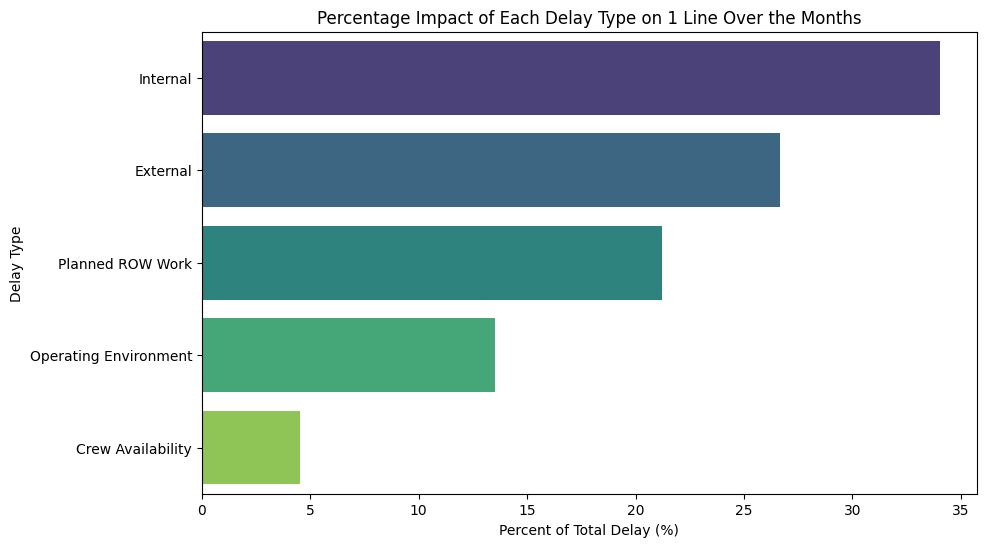

In [ ]:


# Filter the data to include only Weekdays and the Q Line
q_line_data = data[(data['Schedule Rollup'].str.contains(schedule_rollup)) & (data[line] == train_line)]

# Group by Delay Type and sum the Delay Total to find the most impactful Delay Type for Q Line
q_delay_type_impact = q_line_data.groupby('Delay Type')['Delay Total'].sum().reset_index().sort_values(by='Delay Total', ascending=False)

# Calculate the percent of the sum of Delay Total
q_delay_type_impact['Percent of Total Delay'] = (q_delay_type_impact['Delay Total'] / q_delay_type_impact['Delay Total'].sum()) * 100

# Plot the percent of the sum of Delay Total for each Delay Type for Q Line
plt.figure(figsize=(10, 6))
sns.barplot(x='Percent of Total Delay', y='Delay Type', data=q_delay_type_impact, palette='viridis')
plt.title('Percentage Impact of Each Delay Type on ' + train_line + ' Line Over the Months')
plt.xlabel('Percent of Total Delay (%)')
plt.ylabel('Delay Type')
plt.show()


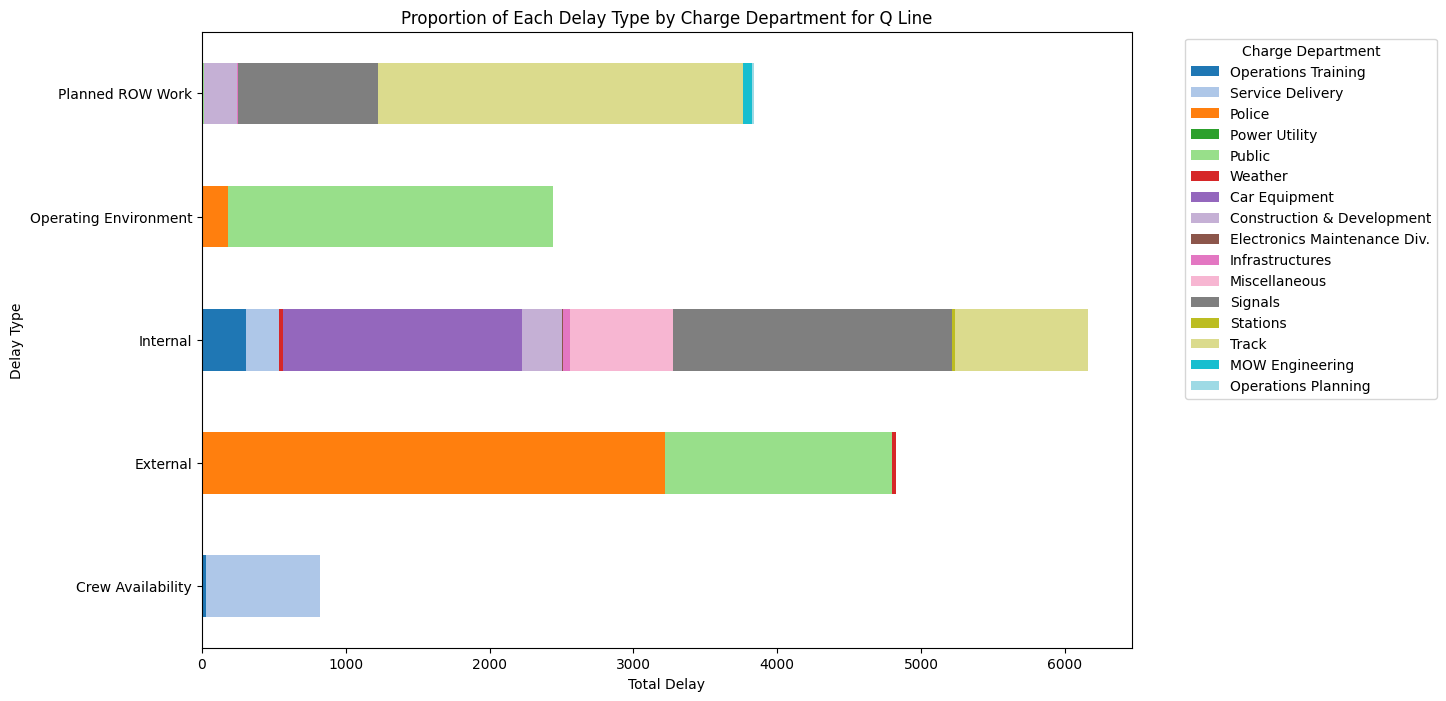

In [ ]:
# Stacked bar chart to show the proportion of each delay type by charge department
q_charge_dept_proportion = q_line_data.groupby(['Delay Type', 'Charge Department'])['Delay Total'].sum().unstack().fillna(0)
q_charge_dept_proportion.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Proportion of Each Delay Type by Charge Department for Q Line')
plt.xlabel('Total Delay')
plt.ylabel('Delay Type')
plt.legend(title='Charge Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



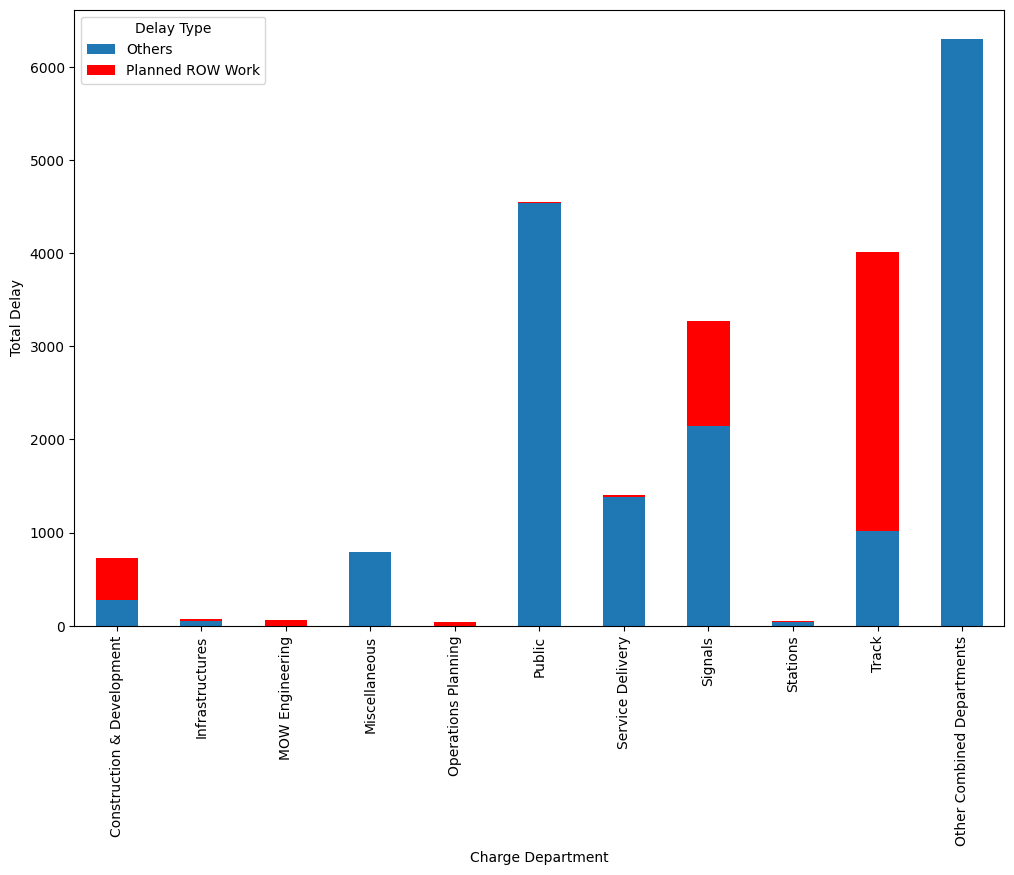

In [ ]:
# Create a custom color map that retains original colors but makes 'Planned ROW Work' red
# Use the default colormap for other delay types, except 'Planned ROW Work'
original_colors = sns.color_palette('tab20', n_colors=len(q_charge_dept_impact.columns))
colors = [('#ff0000' if col == 'Planned ROW Work' else color) for col, color in zip(q_charge_dept_impact.columns, original_colors)]

# Plot the data with the custom color scheme
q_charge_dept_impact.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
# plt.title('Impact of Charge Department on Delay Types for Q Line')
plt.xlabel('Charge Department')
plt.ylabel('Total Delay')
plt.legend(title='Delay Type')
plt.show()


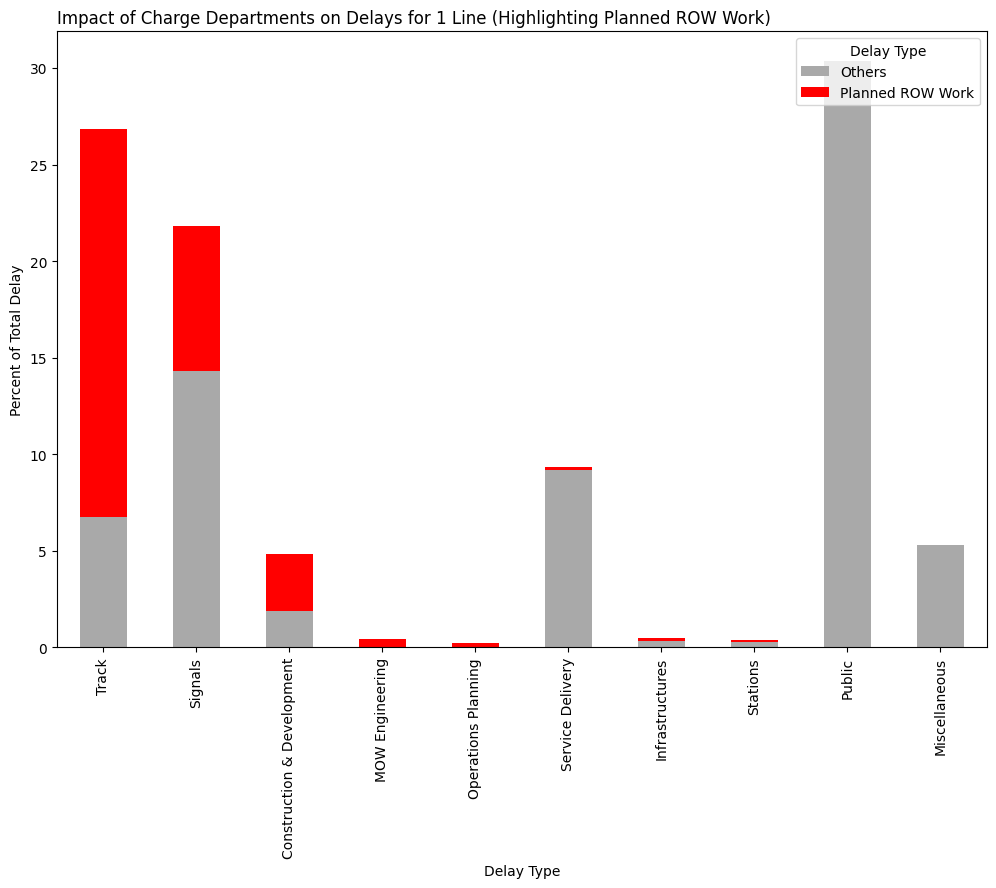

In [ ]:
# Filter the data to include only the Q Line
q_line_data = data[data[line] == train_line]

# Identify departments that have contributed to Planned ROW Work
departments_with_planned_row_work = q_line_data[q_line_data['Delay Type'] == 'Planned ROW Work']['Charge Department'].unique()

# Filter data to include only these departments
filtered_data = q_line_data[q_line_data['Charge Department'].isin(departments_with_planned_row_work)]

# Group by Delay Type and Charge Department
q_charge_dept_impact = filtered_data.groupby(['Charge Department', 'Delay Type'])['Delay Total'].sum().unstack().fillna(0)

# Normalize data to convert to percentage of total delay across all departments and delay types
total_delay_sum = q_charge_dept_impact.sum().sum()
q_charge_dept_impact_percent = (q_charge_dept_impact / total_delay_sum) * 100

# Sort Charge Departments by the magnitude of Planned ROW Work in descending order
q_charge_dept_impact_percent = q_charge_dept_impact_percent.sort_values(by='Planned ROW Work', axis=0, ascending=False)

# Custom color mapping: Red for "Planned ROW Work", Grey for others
colors = ['#ff0000' if delay_type == 'Planned ROW Work' else 'darkgrey' for delay_type in q_charge_dept_impact_percent.columns]

# Plot the data
ax = q_charge_dept_impact_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.xlabel('Delay Type')
plt.ylabel('Percent of Total Delay')

# Custom legend: Highlight Planned ROW Work, others grouped as "Others"
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Planned ROW Work' if label == 'Planned ROW Work' else 'Others' for label in labels]
by_label = dict(zip(new_labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Delay Type', loc='upper right')

plt.title('Impact of Charge Departments on Delays for ' + train_line + ' Line (Highlighting Planned ROW Work)', loc='left')
plt.show()


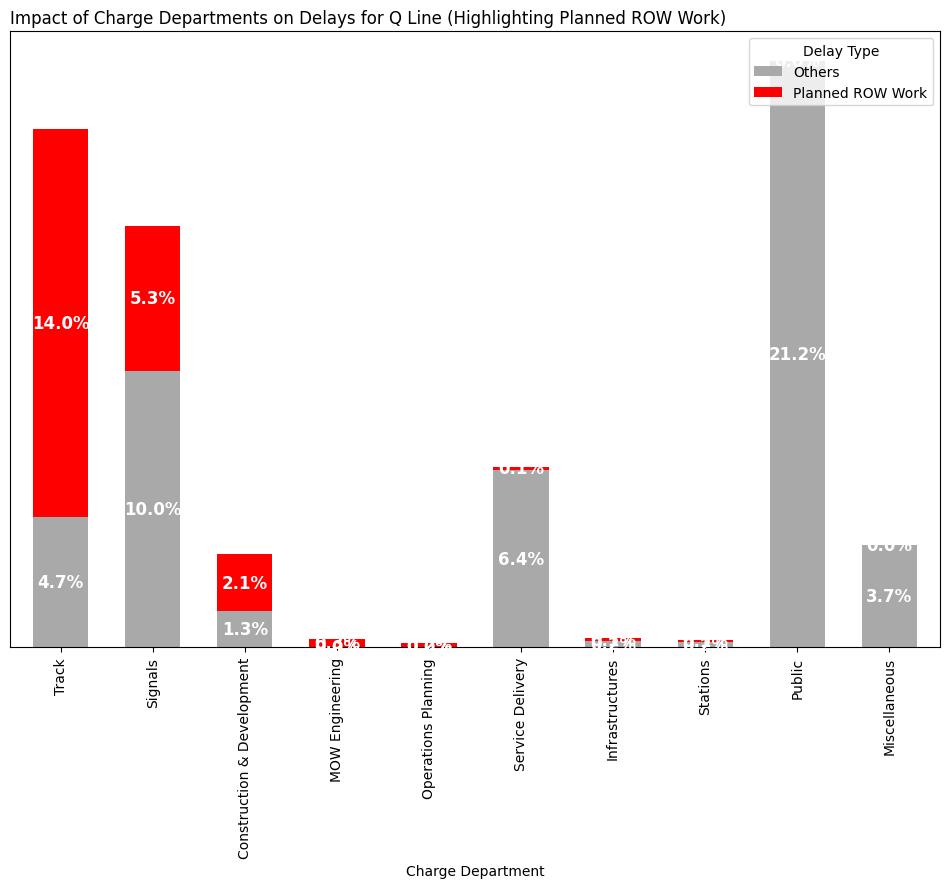

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to include only the Q Line
q_line_data = data[data[line] == train_line]

# Identify departments that have contributed to Planned ROW Work
departments_with_planned_row_work = q_line_data[q_line_data['Delay Type'] == 'Planned ROW Work']['Charge Department'].unique()

# Filter data to include only these departments
filtered_data = q_line_data[q_line_data['Charge Department'].isin(departments_with_planned_row_work)]

# Group by Delay Type and Charge Department
q_charge_dept_impact = filtered_data.groupby(['Charge Department', 'Delay Type'])['Delay Total'].sum().unstack().fillna(0)

# Combine all non-Planned ROW Work into 'Others'
q_charge_dept_impact['Others'] = q_charge_dept_impact.drop(columns=['Planned ROW Work'], errors='ignore').sum(axis=1)
if 'Planned ROW Work' in q_charge_dept_impact.columns:
    q_charge_dept_impact = q_charge_dept_impact[['Others', 'Planned ROW Work']]
else:
    q_charge_dept_impact = q_charge_dept_impact[['Others']]

# Normalize data to percentage of total delay across **all departments and all delay types**
total_delay_all_departments = q_line_data['Delay Total'].sum()
q_charge_dept_impact_percent = (q_charge_dept_impact / total_delay_all_departments) * 100

# Sort Charge Departments by the magnitude of Planned ROW Work in descending order
q_charge_dept_impact_percent = q_charge_dept_impact_percent.sort_values(by='Planned ROW Work', axis=0, ascending=False)

# Custom color mapping: Red for "Planned ROW Work", Grey for "Others"
colors = ['darkgrey', '#ff0000']

# Plot the data with adjusted bar width
ax = q_charge_dept_impact_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors, width=0.6)
plt.xlabel('Charge Department')
plt.ylabel('')  # Removing y-axis label

# Add percentage labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=12, color='white', weight='bold')

# Remove the y-axis
ax.yaxis.set_visible(False)

# Custom legend: Highlight Planned ROW Work and Others
plt.legend(['Others', 'Planned ROW Work'], title='Delay Type', loc='upper right')

plt.title('Impact of Charge Departments on Delays for Q Line (Highlighting Planned ROW Work)', loc='left')
plt.show()


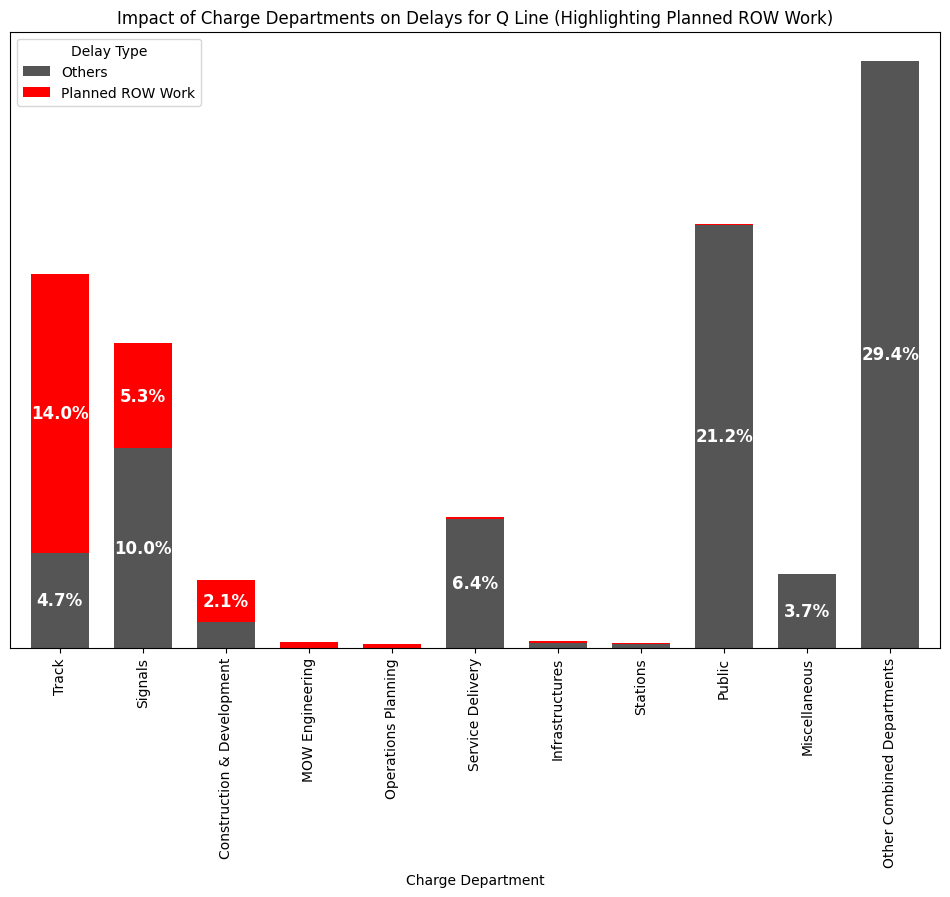

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to include only the Q Line
q_line_data = data[data[line] == train_line]

# Identify departments that have contributed to Planned ROW Work
departments_with_planned_row_work = q_line_data[q_line_data['Delay Type'] == 'Planned ROW Work']['Charge Department'].unique()

# Group by Delay Type and Charge Department
q_charge_dept_impact = q_line_data.groupby(['Charge Department', 'Delay Type'])['Delay Total'].sum().unstack().fillna(0)

# Combine all non-Planned ROW Work into 'Others'
q_charge_dept_impact['Others'] = q_charge_dept_impact.drop(columns=['Planned ROW Work'], errors='ignore').sum(axis=1)
if 'Planned ROW Work' in q_charge_dept_impact.columns:
    q_charge_dept_impact = q_charge_dept_impact[['Others', 'Planned ROW Work']]
else:
    q_charge_dept_impact = q_charge_dept_impact[['Others']]

# Identify departments without Planned ROW Work and group them together
departments_without_planned_row_work = q_charge_dept_impact[q_charge_dept_impact['Planned ROW Work'] == 0]['Others'].sum()

# Combine all encircled departments into one bar
q_charge_dept_impact = q_charge_dept_impact[q_charge_dept_impact['Planned ROW Work'] > 0]

# Add the combined encircled departments as one bar
q_charge_dept_impact.loc['Other Combined Departments'] = [departments_without_planned_row_work, 0]

# Normalize data to percentage of total delay across **all departments and all delay types**
total_delay_all_departments = q_line_data['Delay Total'].sum()
q_charge_dept_impact_percent = (q_charge_dept_impact / total_delay_all_departments) * 100

# Sort Charge Departments by the magnitude of Planned ROW Work in descending order
q_charge_dept_impact_percent = q_charge_dept_impact_percent.sort_values(by='Planned ROW Work', axis=0, ascending=False)

# Custom color mapping: Red for "Planned ROW Work", Light Grey for "Others", Dark Grey for "Other Combined Departments"
colors = ['#555555', '#ff0000', '#d3d3d3']

# Plot the data with adjusted bar width
ax = q_charge_dept_impact_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors, width=0.7)
plt.xlabel('Charge Department')
plt.ylabel('')  # Removing y-axis label

# Add percentage labels inside the bars only if they are >= 2%
for container in ax.containers:
    labels = [f'{h:.1f}%' if h >= 2 else '' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=12, color='white', weight='bold')

# Remove the y-axis
ax.yaxis.set_visible(False)

# Custom legend: Highlight Planned ROW Work, Others, and Other Combined Departments
plt.legend(['Others', 'Planned ROW Work', 'Other Combined Departments'], title='Delay Type', loc='upper left')

plt.title('Impact of Charge Departments on Delays for Q Line (Highlighting Planned ROW Work)')
plt.show()


<ipython-input-187-a4c78ace889f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_line_data['Date'] = pd.to_datetime(q_line_data['Date'])
<ipython-input-187-a4c78ace889f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_line_data['Month'] = q_line_data['Date'].dt.to_period('M')


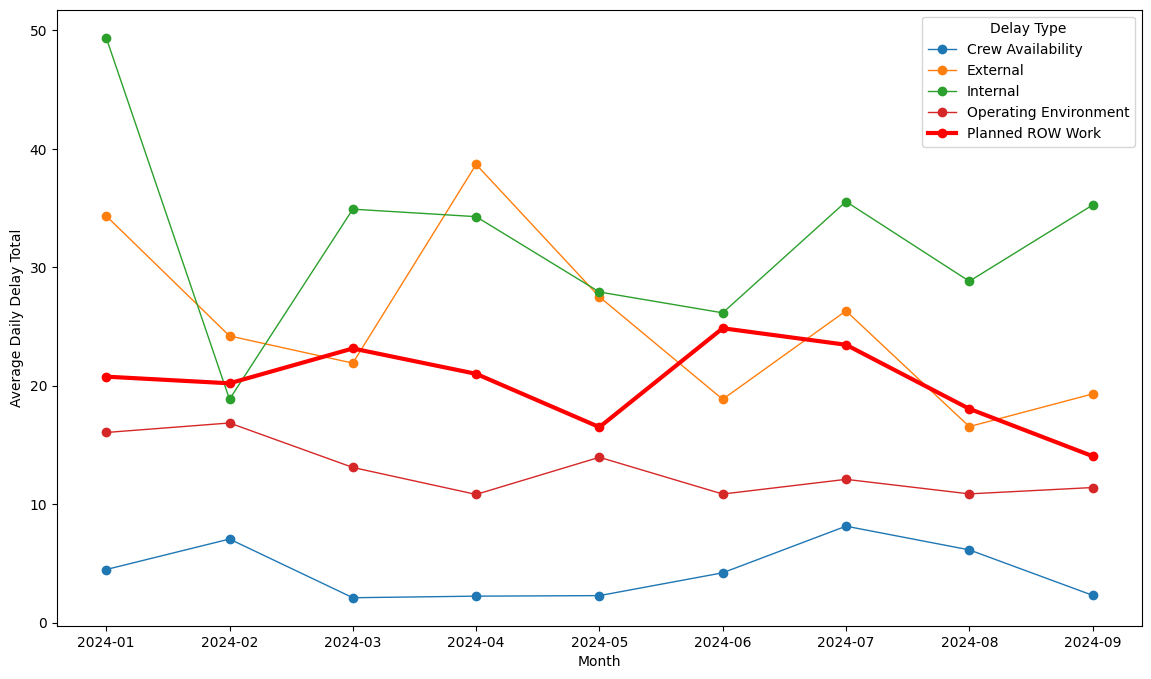

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the data to include only Weekdays and the Q Line
q_line_data = data[(data['Schedule Rollup'].str.contains(schedule_rollup)) & (data[line] == train_line)]

# Convert the 'Date' column to datetime format
q_line_data['Date'] = pd.to_datetime(q_line_data['Date'])

# Calculate the number of weekdays in each month
q_line_data['Month'] = q_line_data['Date'].dt.to_period('M')
weekdays_per_month = q_line_data.groupby('Month')['Date'].nunique()

# Group by month and Delay Type, sum the Delay Total, and normalize by the number of weekdays
q_monthly_impact = q_line_data.groupby(['Month', 'Delay Type'])['Delay Total'].sum().unstack().fillna(0)
q_monthly_impact = q_monthly_impact.divide(weekdays_per_month, axis=0)

# Plot the data with thicker line for 'Planned ROW Work'
plt.figure(figsize=(14, 8))
for column in q_monthly_impact.columns:
    if column == 'Planned ROW Work':
        plt.plot(q_monthly_impact.index.astype(str), q_monthly_impact[column], marker='o', linewidth=3, label=column, color='red')
    else:
        plt.plot(q_monthly_impact.index.astype(str), q_monthly_impact[column], marker='o', linewidth=1, label=column)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Average Daily Delay Total')
plt.legend(title='Delay Type')
plt.show()


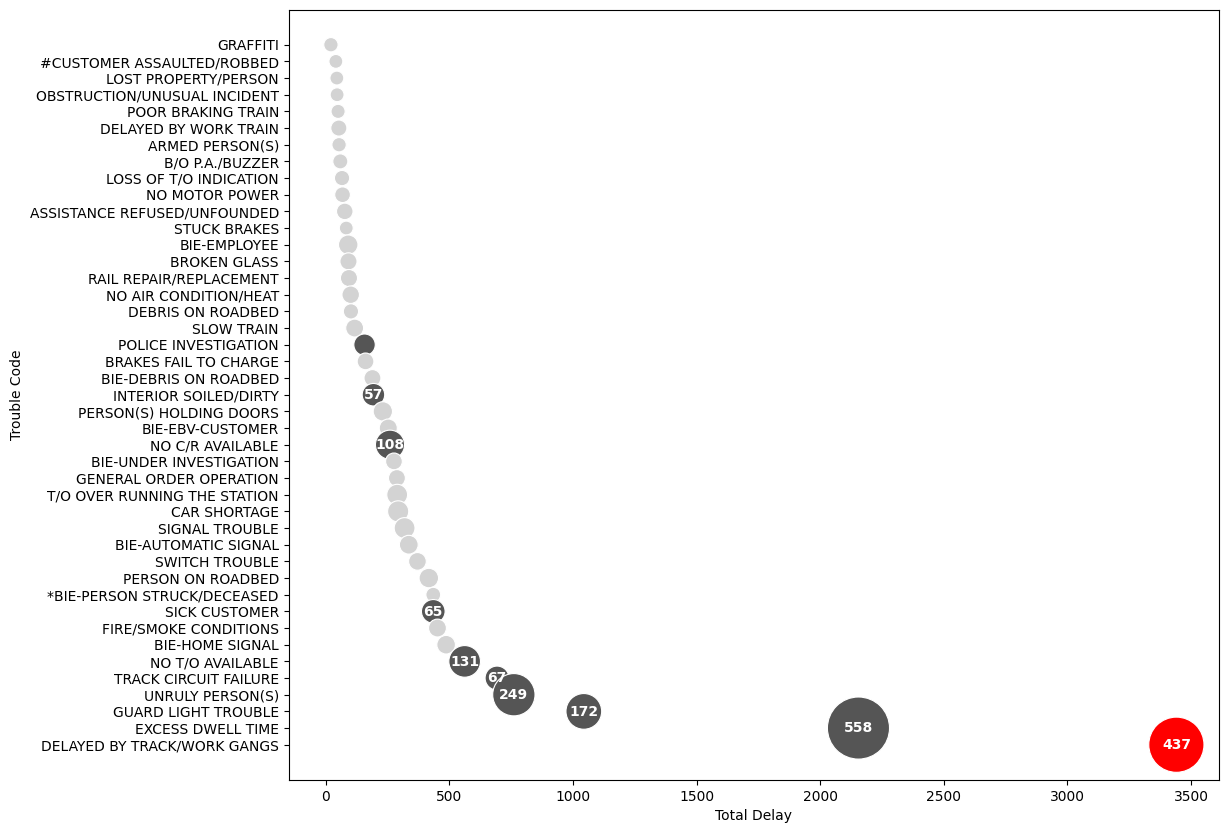

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only Weekdays and the Q Line
q_line_data = data[(data['Schedule Rollup'].str.contains(schedule_rollup)) & (data[line] == train_line)]

# Group by Trouble Code to get the count of Delay Type and sum of Delay Total
q_trouble_code_summary = q_line_data.groupby('Trouble Code').agg({
    'Delay Total': 'sum',
    'Delay Type': 'count'
}).rename(columns={'Delay Type': 'Count'}).reset_index()

# Filter Trouble Codes with 10 or more counts
q_trouble_code_summary = q_trouble_code_summary[q_trouble_code_summary['Count'] >= 10]

# Sort by Delay Total (ascending order)
q_trouble_code_summary = q_trouble_code_summary.sort_values(by='Delay Total', ascending=True)

# Determine colors based on the Trouble Code
q_trouble_code_summary['Color'] = q_trouble_code_summary['Trouble Code'].apply(
    lambda x: '#ff0000' if x == 'DELAYED BY TRACK/WORK GANGS' else ('#555555' if q_trouble_code_summary['Count'].loc[q_trouble_code_summary['Trouble Code'] == x].values[0] >= 50 else '#d3d3d3')
)

# Plot
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Delay Total',
    y='Trouble Code',
    size='Count',
    sizes=(100, 2000),
    hue='Color',
    palette=['#d3d3d3', '#555555', '#ff0000'],
    data=q_trouble_code_summary,
    legend=False
)

# plt.title('Total Impact of Each Trouble Code (X) vs. Count of Delay Type (Bubble Size) on Q Line')
plt.xlabel('Total Delay')
plt.ylabel('Trouble Code')

# Remove grid lines
plt.grid(False)

# Annotate the count of Delay Type on each bubble if count > 50
for i in range(q_trouble_code_summary.shape[0]):
    if q_trouble_code_summary['Count'].iloc[i] > 50:
        plt.text(
            x=q_trouble_code_summary['Delay Total'].iloc[i],
            y=q_trouble_code_summary['Trouble Code'].iloc[i],
            s=f"{q_trouble_code_summary['Count'].iloc[i]}",
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=10,
            fontweight='bold',  # Bold font for the numbers
            color='white'
        )

plt.show()


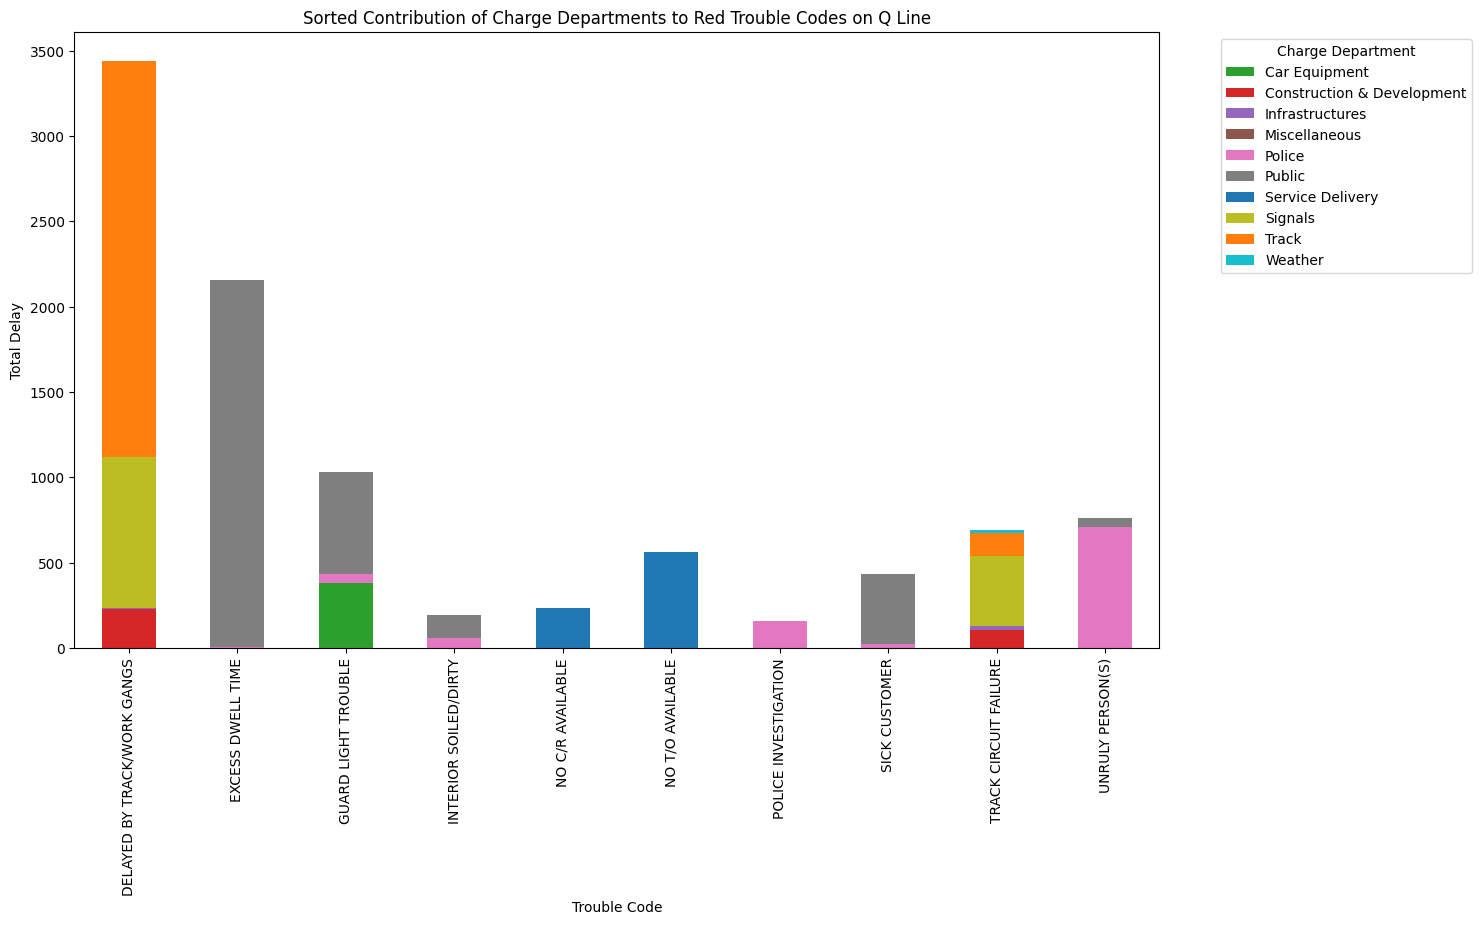

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


# Filter the data to include only Weekdays and the Q Line
q_line_data = data[(data['Schedule Rollup'].str.contains(schedule_rollup)) & (data[line] == train_line)]

# Group by Trouble Code to get the count of Delay Type and sum of Delay Total
q_trouble_code_summary = q_line_data.groupby('Trouble Code').agg({
    'Delay Total': 'sum',
    'Delay Type': 'count'
}).rename(columns={'Delay Type': 'Count'}).reset_index()

# Filter Trouble Codes with 10 or more counts
q_trouble_code_summary = q_trouble_code_summary[q_trouble_code_summary['Count'] >= 10]

# Filter for Trouble Codes with Count >= 50
red_bubbles = q_trouble_code_summary[q_trouble_code_summary['Count'] >= 50]['Trouble Code']

# Filter the original Q Line data for only those Trouble Codes
red_bubble_data = q_line_data[q_line_data['Trouble Code'].isin(red_bubbles)]

# Group by Trouble Code and Charge Department to sum the Delay Total
charge_dept_impact = red_bubble_data.groupby(['Trouble Code', 'Charge Department'])['Delay Total'].sum().unstack().fillna(0)

# Sort each Trouble Code's Charge Department contributions from smallest to largest
sorted_charge_dept_impact = charge_dept_impact.apply(lambda x: x.sort_values(), axis=1)

# Define custom colors for specific charge departments
custom_colors = {
    'Service Delivery': '#1f77b4',  # Blue
    'Track': '#ff7f0e',             # Orange
    'Car Equipment': '#2ca02c',     # Green
    'Construction & Development': '#d62728', # Red
    'Infrastructures': '#9467bd',   # Purple
    'Miscellaneous': '#8c564b',     # Brown
    'Police': '#e377c2',            # Pink
    'Public': '#7f7f7f',            # Grey
    'Signals': '#bcbd22',           # Yellow-green
    'Weather': '#17becf'            # Teal
}

# Reorder columns to match the sorted_charge_dept_impact index
sorted_charge_dept_impact = sorted_charge_dept_impact[sorted(custom_colors.keys())]

# Plot the sorted stacked bar chart with custom colors
sorted_charge_dept_impact.plot(kind='bar', stacked=True, figsize=(14, 8), color=[custom_colors[col] for col in sorted_charge_dept_impact.columns])
plt.title('Sorted Contribution of Charge Departments to Red Trouble Codes on Q Line')
plt.xlabel('Trouble Code')
plt.ylabel('Total Delay')
plt.legend(title='Charge Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


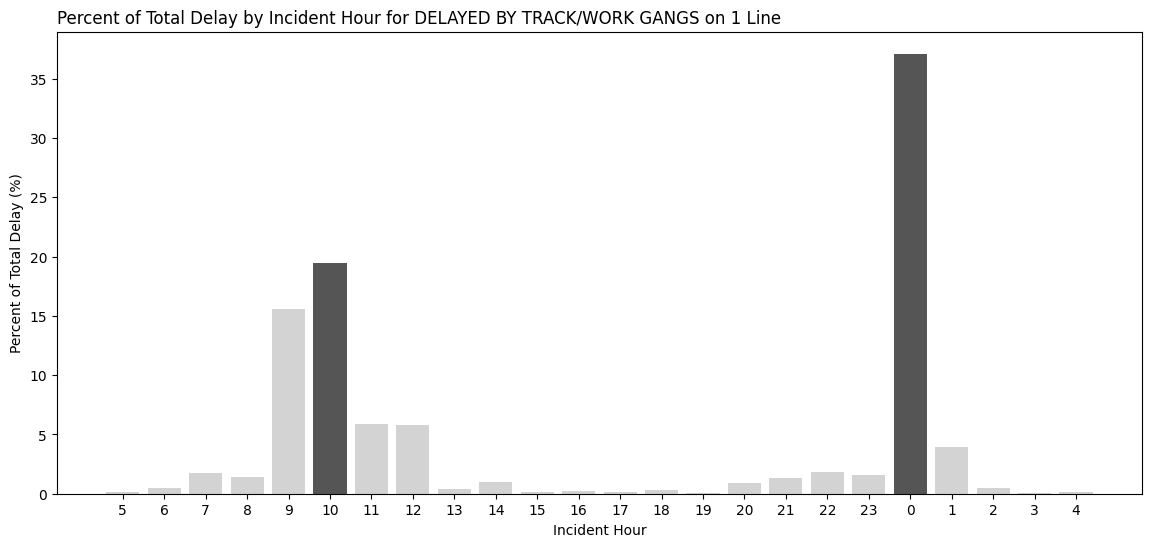

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for "DELAYED BY TRACK/WORK GANGS"
trackwork_gangs_data = data[(data['Line'] == train_line) & (data['Trouble Code'] == trouble_code)]

# Define the custom order for the hours (0 to 23) and include 24-hour format in the incident hour column
hour_order = list(range(5, 24)) + list(range(0, 5))

# Create a DataFrame with all possible hours to ensure missing hours are accounted for
full_hour_range = pd.DataFrame({'Incident Hour': hour_order})

# Group by Incident Hour and sum the Delay Total
hourly_impact = trackwork_gangs_data.groupby('Incident Hour')['Delay Total'].sum().reset_index()

# Merge with the full hour range to include missing hours and fill NaN values with 0
hourly_impact = pd.merge(full_hour_range, hourly_impact, how='left', on='Incident Hour').fillna(0)

# Calculate the percent of total delay for each hour
total_delay_sum = hourly_impact['Delay Total'].sum()
hourly_impact['Percent of Total Delay'] = (hourly_impact['Delay Total'] / total_delay_sum) * 100

# Create a dictionary to map hours to their order (ensuring 24-hour format is respected)
hour_mapping = {hour: order for order, hour in enumerate(hour_order)}

# Mutate the hourly_impact DataFrame with the hour_order column
hourly_impact['hour_order'] = hourly_impact['Incident Hour'].map(hour_mapping)

# Sort by the new 'hour_order' column
hourly_impact = hourly_impact.sort_values('hour_order')

# Identify the tallest bar in daytime (5 AM to 6 PM) and nighttime (7 PM to 4 AM)
daytime = hourly_impact[(hourly_impact['Incident Hour'] >= 5) & (hourly_impact['Incident Hour'] <= 18)]
nighttime = hourly_impact[(hourly_impact['Incident Hour'] >= 19) | (hourly_impact['Incident Hour'] <= 4)]

daytime_max = daytime['Percent of Total Delay'].max()
nighttime_max = nighttime['Percent of Total Delay'].max()

# Define colors based on whether it's the tallest bar in daytime or nighttime
colors = [
    '#555555' if (row['Percent of Total Delay'] == daytime_max or row['Percent of Total Delay'] == nighttime_max)
    else '#d3d3d3'
    for _, row in hourly_impact.iterrows()
]

# Plot the data using 'hour_order' for the x-axis
plt.figure(figsize=(14, 6))
plt.bar(hourly_impact['hour_order'], hourly_impact['Percent of Total Delay'], color=colors)
plt.title(f'Percent of Total Delay by Incident Hour for {trouble_code} on {train_line} Line', loc='left')
plt.xlabel('Incident Hour')
plt.ylabel('Percent of Total Delay (%)')
plt.xticks(ticks=hourly_impact['hour_order'], labels=hour_order)  # Set custom tick labels for time
plt.grid(False)  # Remove grid lines for a cleaner look

# Display the plot
plt.show()


<ipython-input-191-3010d14c5b32>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  q_line_data['Incident Time'] = pd.to_datetime(q_line_data['Incident Time'], errors='coerce')
<ipython-input-191-3010d14c5b32>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_line_data['Incident Time'] = pd.to_datetime(q_line_data['Incident Time'], errors='coerce')
<ipython-input-191-3010d14c5b32>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

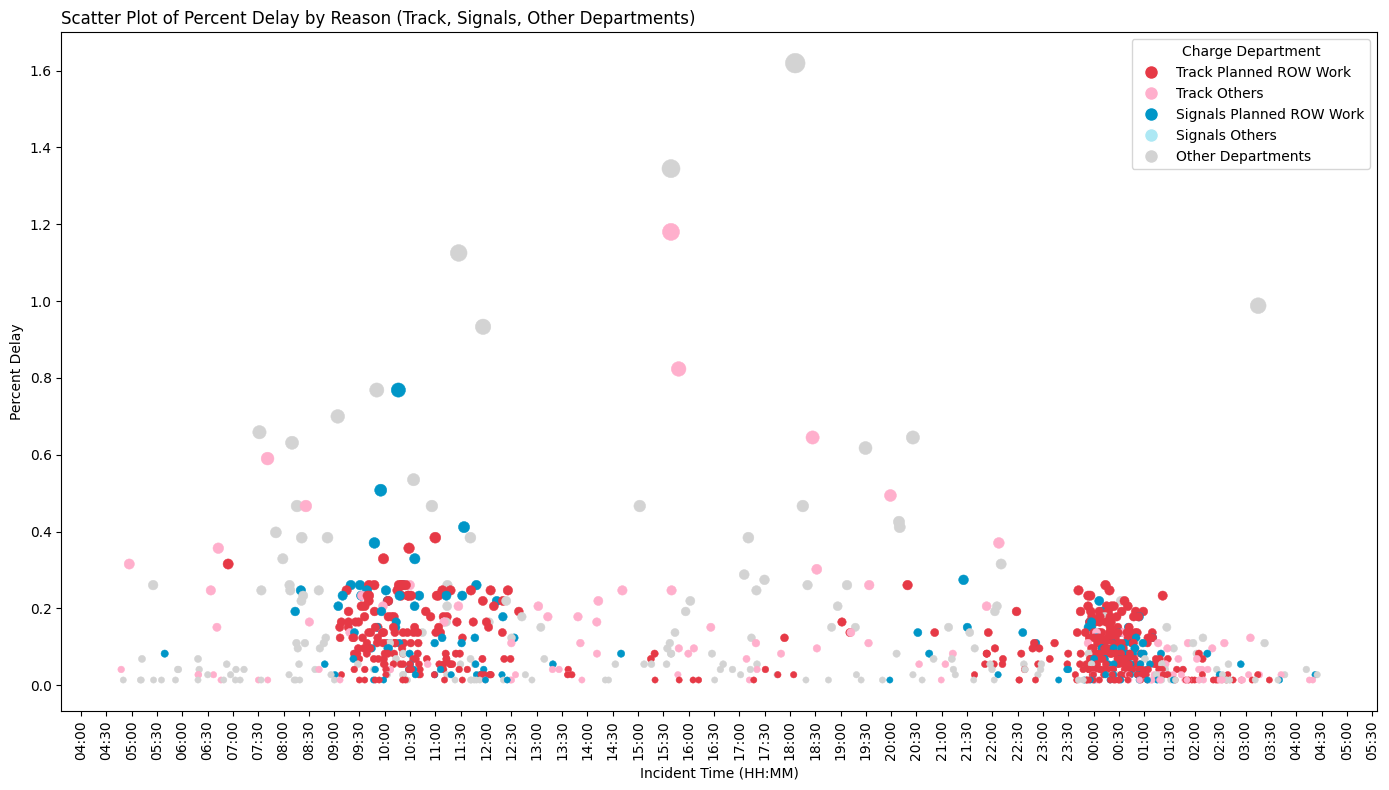

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Filter the data for the Q line based on the Line2 variable and Charge Department variable
q_line_data = data[(data['Line'] == train_line) &
                   ((data['Charge Department'] == 'Signals') | (data['Charge Department'] == 'Track')) &
                   (data['Delay Total'] > 0)]


# Convert Incident Time to a proper datetime format if it's not already
q_line_data['Incident Time'] = pd.to_datetime(q_line_data['Incident Time'], errors='coerce')

# Extract the time component and convert it to seconds since midnight
q_line_data['Seconds Since Midnight'] = q_line_data['Incident Time'].dt.hour * 3600 + q_line_data['Incident Time'].dt.minute * 60 + q_line_data['Incident Time'].dt.second

# Group by Incident Time and Charge Department and calculate the percentage of delay based on Delay Total
total_delay_sum = q_line_data['Delay Total'].sum()
q_line_data['Percent Delay'] = (q_line_data['Delay Total'] / total_delay_sum) * 100

# Filter data to include only times from 05:00 (18000 seconds) through 23:30 (84600 seconds)
q_line_data_wrapped = q_line_data[
    (q_line_data['Seconds Since Midnight'] >= 18000) |
    (q_line_data['Seconds Since Midnight'] <= 16200)
]

# Adjust the Seconds Since Midnight to "wrap around" so times before 05:00 appear at the end
q_line_data_wrapped['Wrapped Seconds'] = q_line_data_wrapped['Seconds Since Midnight'].apply(
    lambda x: x if x >= 18000 else x + 86400
)

# Add jitter manually using np.random.normal for x-axis
jitter_strength = 900  # Adjust jitter strength (in seconds)
q_line_data_wrapped['Jittered Seconds'] = q_line_data_wrapped['Wrapped Seconds'] + np.random.normal(0, jitter_strength, q_line_data_wrapped.shape[0])

# Categorize reasons based on Charge Department and Planned ROW Work or other reasons
def categorize_reason(row):
    if row['Charge Department'] == 'Track' and row['Delay Type'] == 'Planned ROW Work':
        return 'Track Planned ROW Work'
    elif row['Charge Department'] == 'Track' and not row['Delay Type'] == 'Planned ROW Work':
        return 'Track Others'
    elif row['Charge Department'] == 'Signals' and row['Delay Type'] == 'Planned ROW Work':
        return 'Signals Planned ROW Work'
    elif row['Charge Department'] == 'Signals' and row['Delay Type'] == 'Planned ROW Work':
        return 'Signals Others'
    else:
        return 'Other Departments'

q_line_data_wrapped['Reason'] = q_line_data_wrapped.apply(categorize_reason, axis=1)

# Define the custom color palette for each category
custom_palette = {
    'Track Planned ROW Work': '#e63946',  # Red
    'Track Others': '#ffafcc',  # Blue
    'Signals Planned ROW Work': '#0096c7',  # Green
    'Signals Others': '#ade8f4',  # Black
    'Other Departments': '#d3d3d3'  # Grey
}

# Plot the data using Seaborn's scatter plot with jitter and custom color palette
plt.figure(figsize=(14, 8))

# Plotting scatter plot with jitter and removing edgecolor
scatter = sns.scatterplot(
    data=q_line_data_wrapped,
    x='Jittered Seconds',
    y='Percent Delay',
    hue='Reason',  # Use the new 'Reason' column
    palette=custom_palette,
    size='Delay Total',
    sizes=(20, 200),
    legend=False,  # Disable automatic legend
    edgecolor=None,
    marker='o'
)

# Manually create a legend for Charge Department with the correct categories
unique_reasons = list(custom_palette.keys())  # Unique reasons used for color assignment
custom_handles = [plt.Line2D([0], [0], marker='o', color='w', label=reason,
                             markerfacecolor=custom_palette[reason], markersize=10) for reason in unique_reasons]

plt.legend(handles=custom_handles, title="Charge Department", loc='upper right')

# Set the x-axis to display time in 30-minute intervals
def seconds_to_time(seconds):
    hours = (seconds // 3600) % 24  # Wrap around the hours
    minutes = (seconds % 3600) // 60
    return f"{hours:02}:{minutes:02}"

# Set major ticks every 30 minutes (1800 seconds)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1800))

# Set the x-axis labels to time format
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: seconds_to_time(int(x))))

# Customize plot labels and title
plt.xlabel('Incident Time (HH:MM)')
plt.ylabel('Percent Delay')
plt.title('Scatter Plot of Percent Delay by Reason (Track, Signals, Other Departments)', loc='left')

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)

# Show the plot without the size legend and without the borders around the bubbles
plt.tight_layout()
plt.show()


<ipython-input-192-91f23b16a496>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_line_data_wrapped['Hour'] = q_line_data_wrapped['Incident Time'].dt.hour
<ipython-input-192-91f23b16a496>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_line_data_wrapped['Percent Delay Total'] = (q_line_data_wrapped['Delay Total'] / total_delay) * 100


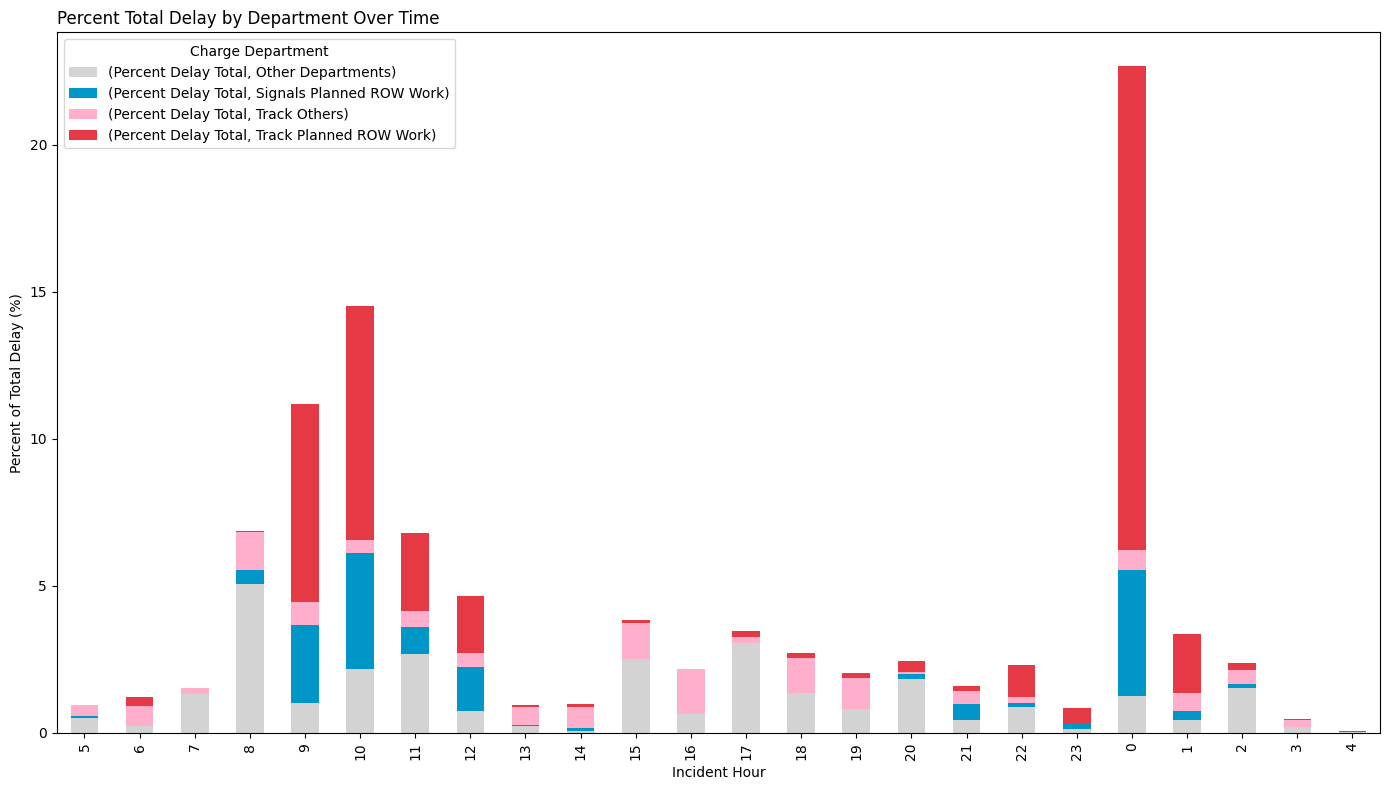

In [ ]:
# Ensure the order of the hours is from 5 AM to 4 AM
hour_order = list(range(5, 24)) + list(range(0, 5))

# Group the data by hour and department, calculate the percentage of delay
q_line_data_wrapped['Hour'] = q_line_data_wrapped['Incident Time'].dt.hour
total_delay = q_line_data_wrapped['Delay Total'].sum()
q_line_data_wrapped['Percent Delay Total'] = (q_line_data_wrapped['Delay Total'] / total_delay) * 100

stacked_data = q_line_data_wrapped.groupby(['Hour', 'Reason']).agg({'Percent Delay Total': 'sum'}).unstack()

# Plot with correct hour order
stacked_data = stacked_data.reindex(hour_order, level='Hour')
stacked_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=[custom_palette[key] for key in stacked_data.columns.levels[1]])
plt.xlabel('Incident Hour')
plt.ylabel('Percent of Total Delay (%)')
plt.title('Percent Total Delay by Department Over Time', loc='left')
plt.legend(title='Charge Department', loc='upper left')
plt.xticks(ticks=range(len(hour_order)), labels=hour_order)
plt.tight_layout()
plt.show()


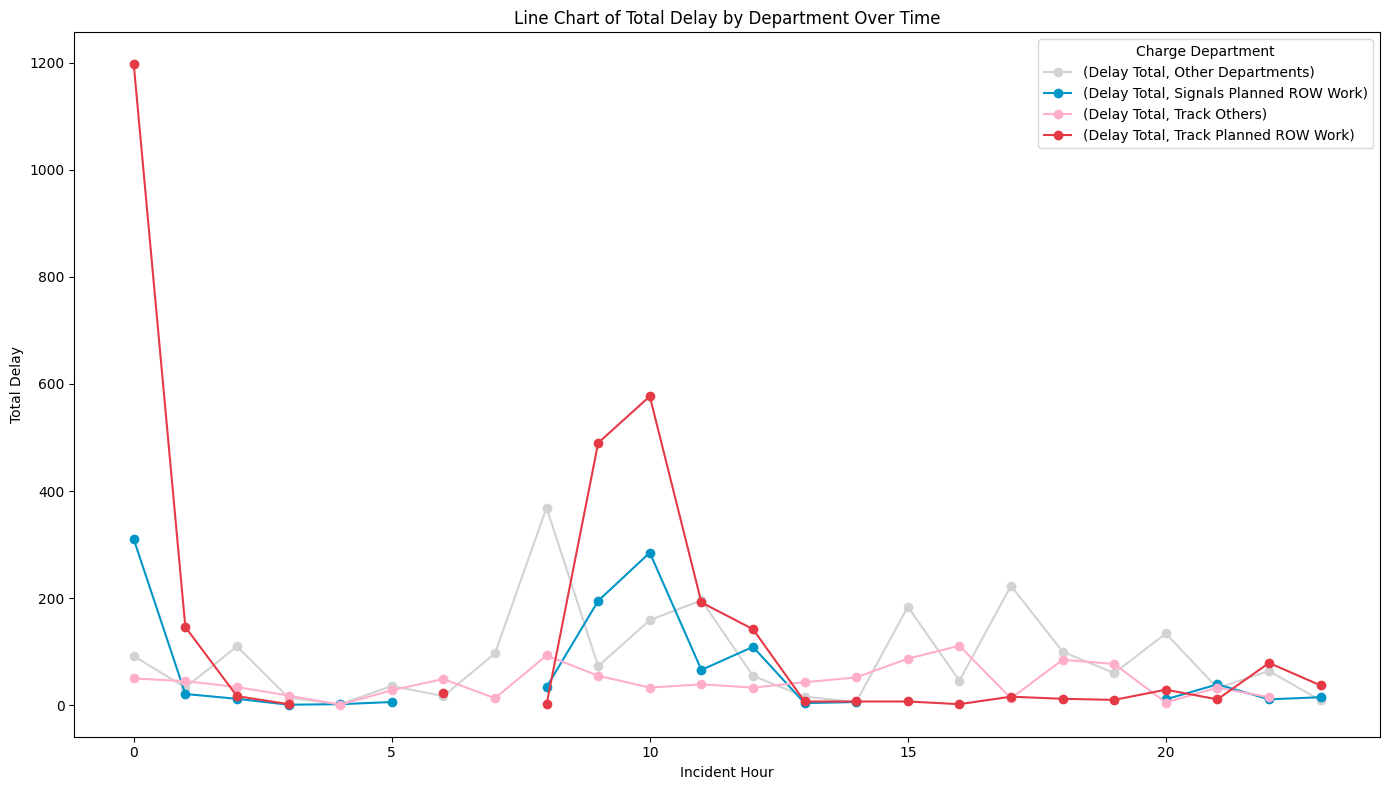

In [ ]:
# Group the data by hour and department, then plot a line chart showing delay contribution trends over time
line_data = q_line_data_wrapped.groupby(['Hour', 'Reason']).agg({'Delay Total': 'sum'}).unstack()

line_data.plot(kind='line', figsize=(14, 8), marker='o', color=[custom_palette[key] for key in line_data.columns.levels[1]])
plt.xlabel('Incident Hour')
plt.ylabel('Total Delay')
plt.title('Line Chart of Total Delay by Department Over Time')
plt.legend(title='Charge Department', loc='upper right')
plt.tight_layout()
plt.show()


<ipython-input-194-e338ada8bdf8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trackwork_gangs_data['Date'] = pd.to_datetime(trackwork_gangs_data['Date'])
<ipython-input-194-e338ada8bdf8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trackwork_gangs_data['Month'] = trackwork_gangs_data['Date'].dt.to_period('M')


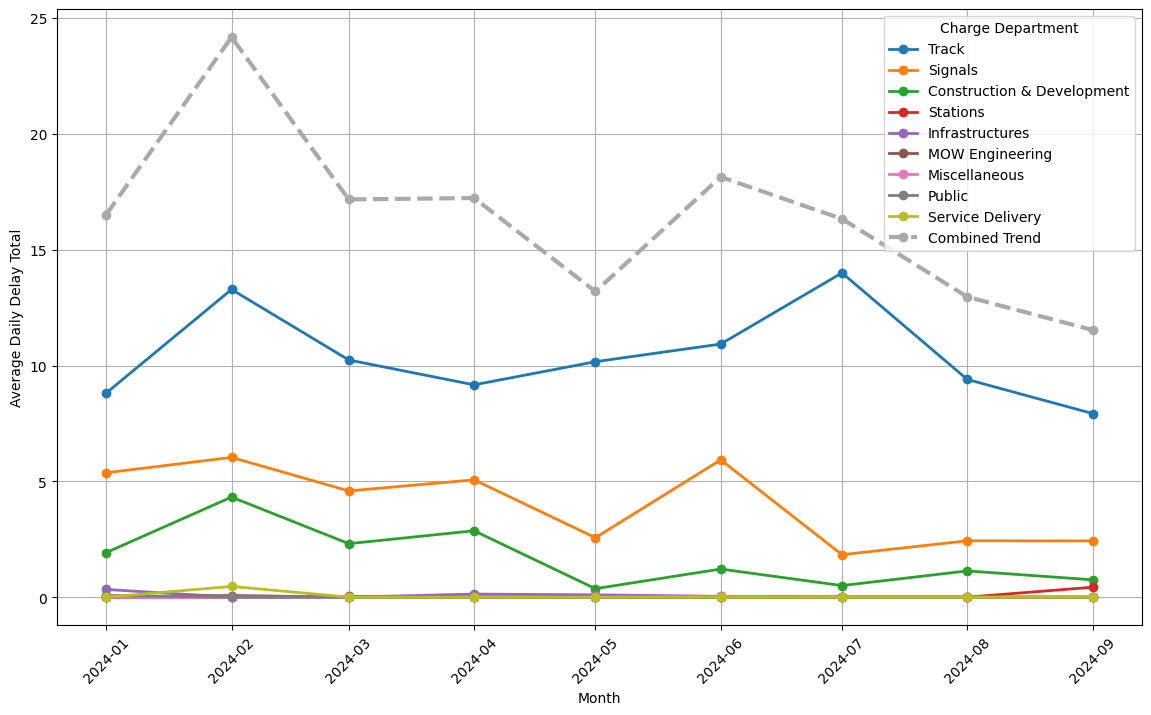

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for the Q Line and "DELAYED BY TRACK/WORK GANGS"
trackwork_gangs_data = data[(data['Line'] == train_line) & (data['Trouble Code'] == trouble_code)]

# Convert the 'Date' column to datetime format
trackwork_gangs_data['Date'] = pd.to_datetime(trackwork_gangs_data['Date'])

# Calculate the number of weekdays in each month
trackwork_gangs_data['Month'] = trackwork_gangs_data['Date'].dt.to_period('M')
weekdays_per_month = trackwork_gangs_data.groupby('Month')['Date'].nunique()

# Group by month and Charge Department, sum the Delay Total, and normalize by the number of weekdays
monthly_dept_impact = trackwork_gangs_data.groupby([trackwork_gangs_data['Date'].dt.to_period('M'), 'Charge Department'])['Delay Total'].sum().unstack().fillna(0)
monthly_dept_impact = monthly_dept_impact.divide(weekdays_per_month, axis=0)

# Convert PeriodIndex to a regular datetime index for plotting
monthly_dept_impact.index = monthly_dept_impact.index.to_timestamp()

# Calculate the combined trend line by summing delays across all departments
combined_trend = monthly_dept_impact.sum(axis=1)

# Sort Charge Departments by the final month's value
final_values = monthly_dept_impact.iloc[-1].sort_values(ascending=False)
sorted_departments = final_values.index

# Plot the time series with trend lines for each Charge Department in sorted order
plt.figure(figsize=(14, 8))

for dept in sorted_departments:
    plt.plot(monthly_dept_impact.index, monthly_dept_impact[dept], marker='o', label=dept, linestyle='-', linewidth=2)

# Plot the combined trend line
plt.plot(combined_trend.index, combined_trend, marker='o', linestyle='--', color='darkgrey', linewidth=3, label='Combined Trend')

# Left justify the title
# plt.title('Monthly Trend of Delays by "DELAYED BY TRACK/WORK GANGS" on Q Line by Charge Department', loc='left')
plt.xlabel('Month')
plt.ylabel('Average Daily Delay Total')
plt.grid(True)  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend(title='Charge Department')
plt.show()


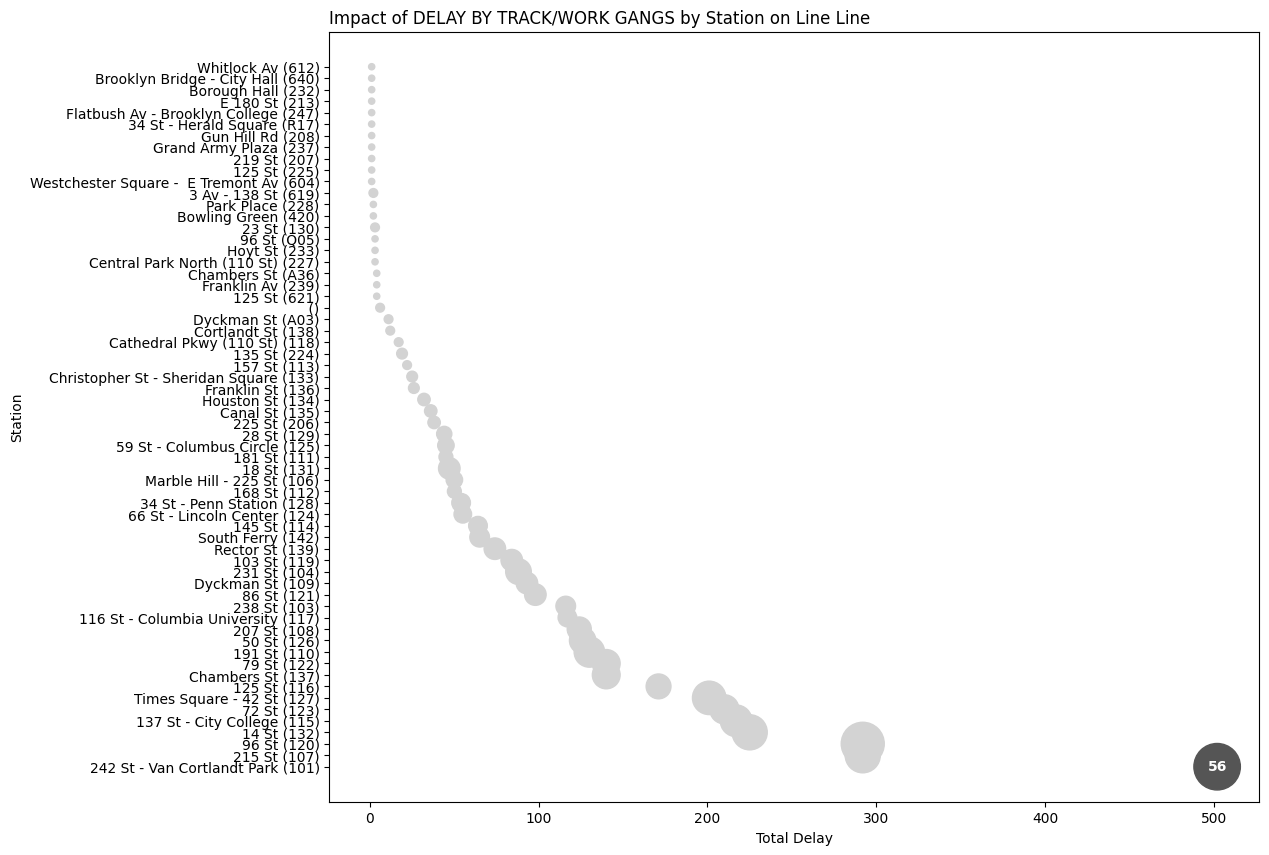

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for the Q Line and "DELAYED BY TRACK/WORK GANGS"
trackwork_gangs_data = data[(data['Line'] == train_line) & (data['Trouble Code'] == trouble_code)]

# Group by Station Unique and calculate the sum of Delay Total and count of delays
station_impact = trackwork_gangs_data.groupby('Station Unique').agg({
    'Delay Total': 'sum',
    'Station Unique': 'count'
}).rename(columns={'Station Unique': 'Delay Count'}).reset_index()

# Sort the stations by 'Delay Total' in ascending order for visualization
station_impact = station_impact.sort_values(by='Delay Total', ascending=False)

# Check if there are stations with Delay Count >= 50, else take the top 5 stations by Delay Count
if (station_impact['Delay Count'] >= 50).any():
    # Highlight stations with delay count >= 50
    highlight_stations = station_impact[station_impact['Delay Count'] >= 50]['Station Unique'].values
else:
    # Highlight the top 5 stations based on Delay Count
    highlight_stations = station_impact.nlargest(5, 'Delay Count')['Station Unique'].values

# Define colors: dark gray for highlighted stations and light gray for the others
colors = ['#555555' if station in highlight_stations else '#d3d3d3' for station in station_impact['Station Unique']]

# Plot the data using a scatter plot
plt.figure(figsize=(12, 10))

# Plot the bubbles with size based on delay count
plt.scatter(station_impact['Delay Total'], station_impact['Station Unique'],
            s=station_impact['Delay Count'] * 20, color=colors)

# Annotate bubbles for the highlighted stations
for i in range(station_impact.shape[0]):
    if station_impact['Station Unique'].iloc[i] in highlight_stations:
        plt.annotate(str(station_impact['Delay Count'].iloc[i]),
                     (station_impact['Delay Total'].iloc[i], station_impact['Station Unique'].iloc[i]),
                     color='white', fontsize=10, ha='center', va='center', weight='bold')

# Set title, labels, and grid properties
plt.title(f'Impact of DELAY BY TRACK/WORK GANGS by Station on {line} Line', loc='left')
plt.xlabel('Total Delay')
plt.ylabel('Station')
plt.grid(False)  # Remove grid lines

# Show the plot
plt.show()


Q Line

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the updated dataset by skipping the first two rows[196]
0s

file_path_updated = '/content/B_Median_Lateness_Heat_Map.csv'
data_cleaned_updated = pd.read_csv(file_path_updated, skiprows=2)

# Rename the columns according to the structure provided
data_cleaned_updated.columns = [
    'Station', 'Median_Lateness_Night', 'Median_Lateness_AM_Peak', 'Median_Lateness_Mid',
    'Median_Lateness_PM_Peak', 'Median_Lateness_Eve', 'Median_Lateness_S_Night',
    'Median_Lateness_S_AM_Peak', 'Median_Lateness_S_Mid', 'Median_Lateness_S_PM_Peak',
    'Median_Lateness_S_Eve'
]

# Convert the dataset to long format
data_long_updated = pd.melt(data_cleaned_updated, id_vars=['Station'],
                            var_name='Period', value_name='Median_Lateness')

# Separate the data into 'N' and 'S' directions based on Period
data_north_updated = data_long_updated[
    data_long_updated['Period'].str.contains('Median_Lateness_') &
    ~data_long_updated['Period'].str.contains('_S_')
]
data_south_updated = data_long_updated[
    data_long_updated['Period'].str.contains('Median_Lateness_S_')
]

# Recalculate the combined trend using the median instead of the mean
combined_north_median = data_north_updated.groupby('Station')['Median_Lateness'].median().reset_index()
combined_south_median = data_south_updated.groupby('Station')['Median_Lateness'].median().reset_index()

# Plot trend lines for the N direction with a combined median trend line and horizontal line
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_north_updated, x='Station', y='Median_Lateness', hue='Period', marker='o')

# Adding a combined median trend line (median across all periods for the North direction)
sns.lineplot(data=combined_north_median, x='Station', y='Median_Lateness', color='black', label='Combined Median Trend', marker='o')

# Adding a faint horizontal dashed line at the intersection of the combined median trend with the vertical axis
intersect_north_median = combined_north_median['Median_Lateness'].median()
plt.axhline(y=intersect_north_median, color='gray', linestyle='--', alpha=0.5)
plt.text(0, intersect_north_median, f'{intersect_north_median:.2f}', color='black', ha='right', va='center')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Station')
plt.ylabel('Median Lateness')
plt.title('Median Lateness Trends by Period (North Direction) with Combined Median Trend Line')
plt.legend(title='Period')
plt.tight_layout()
plt.show()

# Plot trend lines for the S direction with a combined median trend line and horizontal line
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_south_updated, x='Station', y='Median_Lateness', hue='Period', marker='o')

# Adding a combined median trend line (median across all periods for the South direction)
sns.lineplot(data=combined_south_median, x='Station', y='Median_Lateness', color='black', label='Combined Median Trend', marker='o')

# Adding a faint horizontal dashed line at the intersection of the combined median trend with the vertical axis
intersect_south_median = combined_south_median['Median_Lateness'].median()
plt.axhline(y=intersect_south_median, color='gray', linestyle='--', alpha=0.5)
plt.text(0, intersect_south_median, f'{intersect_south_median:.2f}', color='black', ha='right', va='center')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Station')
plt.ylabel('Median Lateness')
plt.title('Median Lateness Trends by Period (South Direction) with Combined Median Trend Line')
plt.legend(title='Period')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/B_Median_Lateness_Heat_Map.csv'

B Line

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the updated dataset by skipping the first two rows
file_path_updated = '/content/B_Median_Lateness_Heat_Map.csv'
data_cleaned_updated = pd.read_csv(file_path_updated, skiprows=2)

# Rename the columns according to the structure provided
data_cleaned_updated.columns = [
    'Timepoint', 'Median_Lateness_Night', 'Median_Lateness_AM_Peak', 'Median_Lateness_Mid',
    'Median_Lateness_PM_Peak', 'Median_Lateness_Eve', 'Median_Lateness_S_Night',
    'Median_Lateness_S_AM_Peak', 'Median_Lateness_S_Mid', 'Median_Lateness_S_PM_Peak',
    'Median_Lateness_S_Eve'
]

# Convert the dataset to long format
data_long_updated = pd.melt(data_cleaned_updated, id_vars=['Timepoint'],
                            var_name='Period', value_name='Median_Lateness')

# Remove "Median_Lateness_" and underscores from the Period labels
data_long_updated['Period'] = data_long_updated['Period'].str.replace('Median_Lateness_', '')
data_long_updated['Period'] = data_long_updated['Period'].str.replace('_', ' ')

# Separate the data into 'N' and 'S' directions based on Period
data_north_updated = data_long_updated[
    data_long_updated['Period'].str.contains('Night|AM Peak|Mid|PM Peak|Eve') &
    ~data_long_updated['Period'].str.contains('S ')
]
data_south_updated = data_long_updated[
    data_long_updated['Period'].str.contains('S Night|S AM Peak|S Mid|S PM Peak|S Eve')
]

# Reverse the order for the north direction and keep it for the south direction
data_north_updated = data_north_updated.iloc[::-1].reset_index(drop=True)
data_south_updated = data_south_updated.reset_index(drop=True)

# Plot trend lines for the N direction
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_north_updated, x='Timepoint', y='Median_Lateness', hue='Period', marker='o')

# Add a dashed orange line at the 5-minute lateness point
plt.axhline(y=5, color='orange', linestyle='--', linewidth=1)
# Add a dashed black line at the zero lateness mark
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Timepoint')
plt.ylabel('Median Lateness')
plt.title('Q Line: Median Lateness Trends by Period (North Direction)', loc='left')
plt.legend(title='Period')
plt.tight_layout()
plt.show()

# Plot trend lines for the S direction
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_south_updated, x='Timepoint', y='Median_Lateness', hue='Period', marker='o')

# Add a dashed orange line at the 5-minute lateness point
plt.axhline(y=5, color='orange', linestyle='--', linewidth=1)
# Add a dashed black line at the zero lateness mark
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Timepoint')
plt.ylabel('Median Lateness')
plt.title('Q Line: Median Lateness Trends by Period (South Direction)', loc='left')
plt.legend(title='Period')
plt.tight_layout()
plt.show()
